In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

In [280]:
card = pd.read_csv('CARD_SPENDING_RESIDENT_KOR.csv')
card['STD_DD'] = card['STD_DD'].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))

card['WEEKDAY'] = card['STD_DD'].dt.dayofweek

card['WEEK_NUM'] = card['STD_DD'].dt.weekofyear

card['MONTH_DAY'] = card['STD_DD'].astype('str').str[-5:]

ha = card[(card['MCT_CAT_CD'] == "가전") & (card['GU_CD'].str.startswith('서울')) & (card['STD_DD']<='2020-05-05')]
haha = card[(card['MCT_CAT_CD'] == "가전") & (card['GU_CD'].str.startswith('대구')) & (card['STD_DD']<='2020-05-05')]

ha['PERIOD'] = np.where(ha['STD_DD']<'2020-02-21','normal',np.where(ha['STD_DD']<='2020-03-15','spread','ease'))

haha['PERIOD'] = np.where(haha['STD_DD']<'2020-02-21','normal',np.where(haha['STD_DD']<='2020-03-15','spread','ease'))

# 나이대 별 분석

Text(0.5, 1.0, '연령대의 시기별 소비금액(서울)')

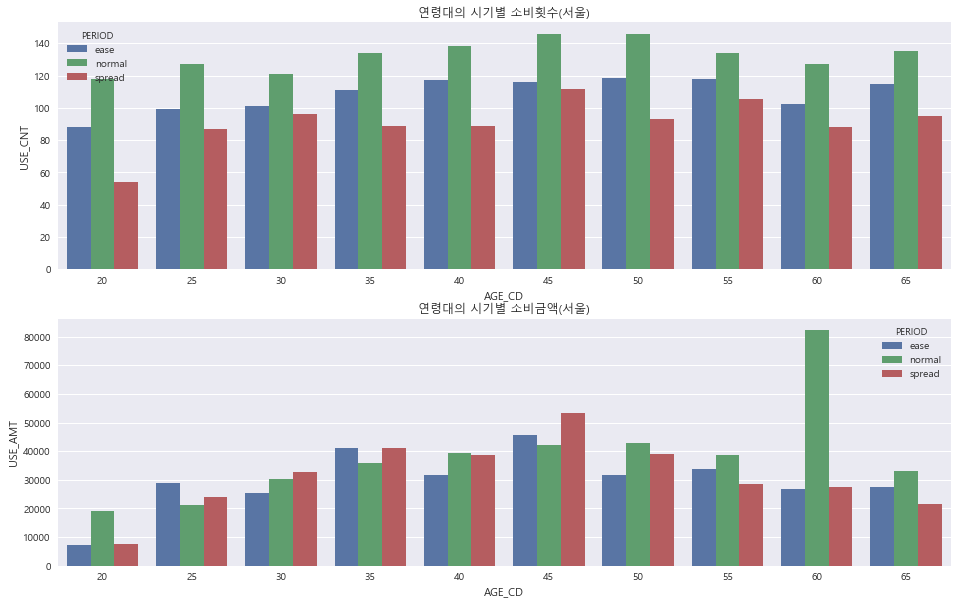

In [281]:
# YEAR, MONTH로 묶고 AMT, CNT 합 구하기
category_df = ha.groupby(['PERIOD','AGE_CD','DONG_CD'])[['USE_AMT', 'USE_CNT']].mean().reset_index()
category_df = category_df.groupby(['PERIOD','AGE_CD'])[['USE_AMT', 'USE_CNT']].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
sns.barplot(x=category_df['AGE_CD'], y=category_df['USE_CNT'], hue='PERIOD', data=category_df, ax=axes[0])
sns.barplot(x=category_df['AGE_CD'], y=category_df['USE_AMT'], hue='PERIOD', data=category_df, ax=axes[1])
axes[0].set_title("연령대의 시기별 소비횟수(서울)")
axes[1].set_title("연령대의 시기별 소비금액(서울)")

Text(0.5, 1.0, '연령대의 시기별 소비금액(대구)')

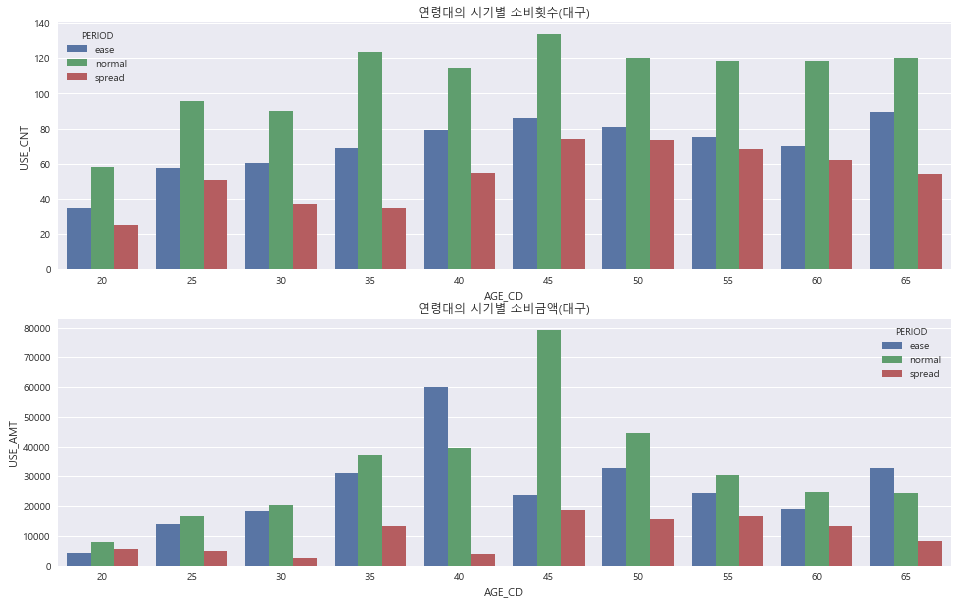

In [282]:
# YEAR, MONTH로 묶고 AMT, CNT 합 구하기
category_df = haha.groupby(['PERIOD','AGE_CD','DONG_CD'])[['USE_AMT', 'USE_CNT']].mean().reset_index()
category_df = category_df.groupby(['PERIOD','AGE_CD'])[['USE_AMT', 'USE_CNT']].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
sns.barplot(x=category_df['AGE_CD'], y=category_df['USE_CNT'], hue='PERIOD', data=category_df, ax=axes[0])
sns.barplot(x=category_df['AGE_CD'], y=category_df['USE_AMT'], hue='PERIOD', data=category_df, ax=axes[1])
axes[0].set_title("연령대의 시기별 소비횟수(대구)")
axes[1].set_title("연령대의 시기별 소비금액(대구)")

In [310]:
def period_weekday_hue_age_seoul(how_col):
    category_df = ha.groupby(['PERIOD','AGE_CD','DONG_CD','WEEKDAY'])[[how_col]].mean().reset_index()
    category_df = category_df.groupby(['PERIOD','AGE_CD','WEEKDAY'])[[how_col]].sum().reset_index()

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))
    sns.barplot(x=category_df.query('PERIOD == "normal"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[0])
    sns.barplot(x=category_df.query('PERIOD == "spread"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[1])
    sns.barplot(x=category_df.query('PERIOD == "ease"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[2])
    axes[0].set_title("이전 시기 연령대의 요일별 {}(서울)".format(how_col))
    axes[1].set_title("확산 시기 연령대의 요일별 {}(서울)".format(how_col))
    axes[2].set_title("완화 시기 연령대의 요일별 {}(서울)".format(how_col))
    
def period_weekday_hue_age_daegu(how_col):
    category_df = haha.groupby(['PERIOD','AGE_CD','DONG_CD','WEEKDAY'])[[how_col]].mean().reset_index()
    category_df = category_df.groupby(['PERIOD','AGE_CD','WEEKDAY'])[[how_col]].sum().reset_index()

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))
    sns.barplot(x=category_df.query('PERIOD == "normal"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[0])
    sns.barplot(x=category_df.query('PERIOD == "spread"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[1])
    sns.barplot(x=category_df.query('PERIOD == "ease"')['AGE_CD'], y=category_df[how_col], hue='WEEKDAY', data=category_df, ax=axes[2])
    axes[0].set_title("이전 시기 연령대의 요일별 {}(대구)".format(how_col))
    axes[1].set_title("확산 시기 연령대의 요일별 {}(대구)".format(how_col))
    axes[2].set_title("완화 시기 연령대의 요일별 {}(대구)".format(how_col))

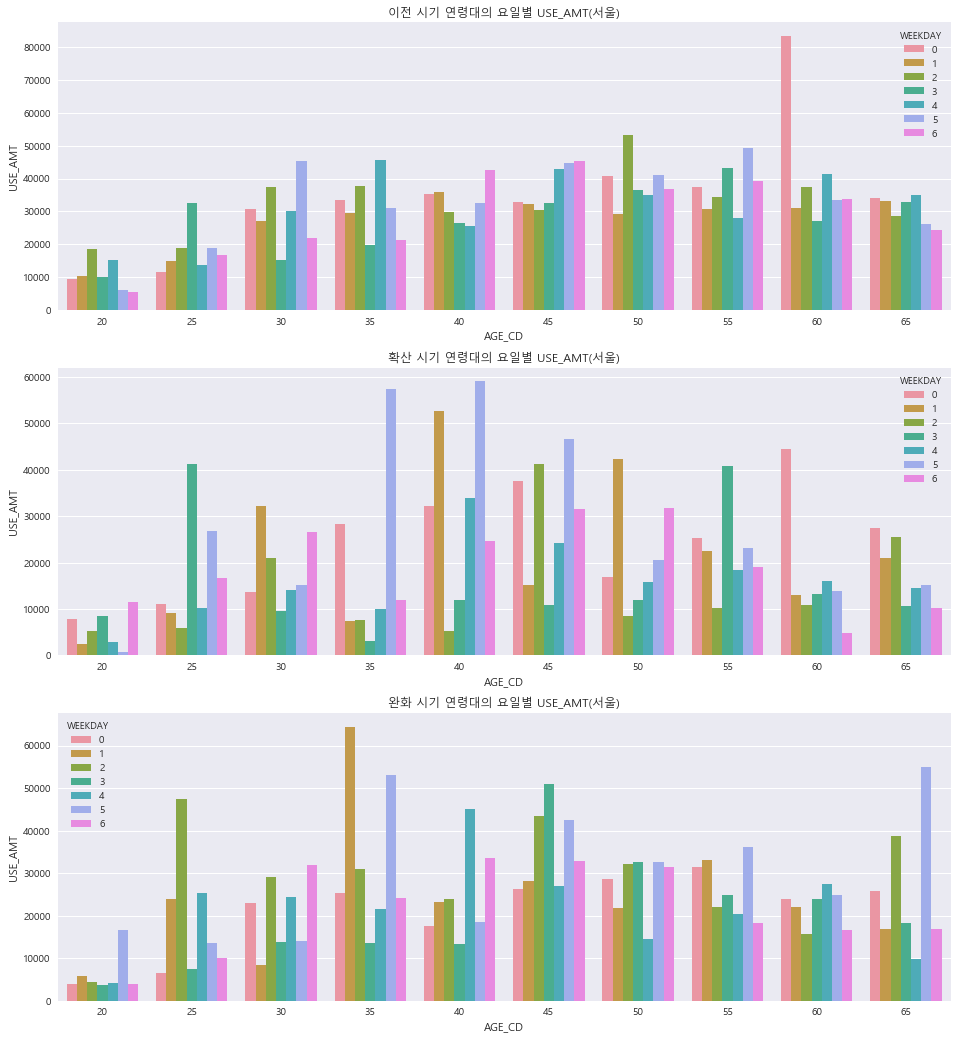

In [311]:
period_weekday_hue_age_seoul('USE_AMT')

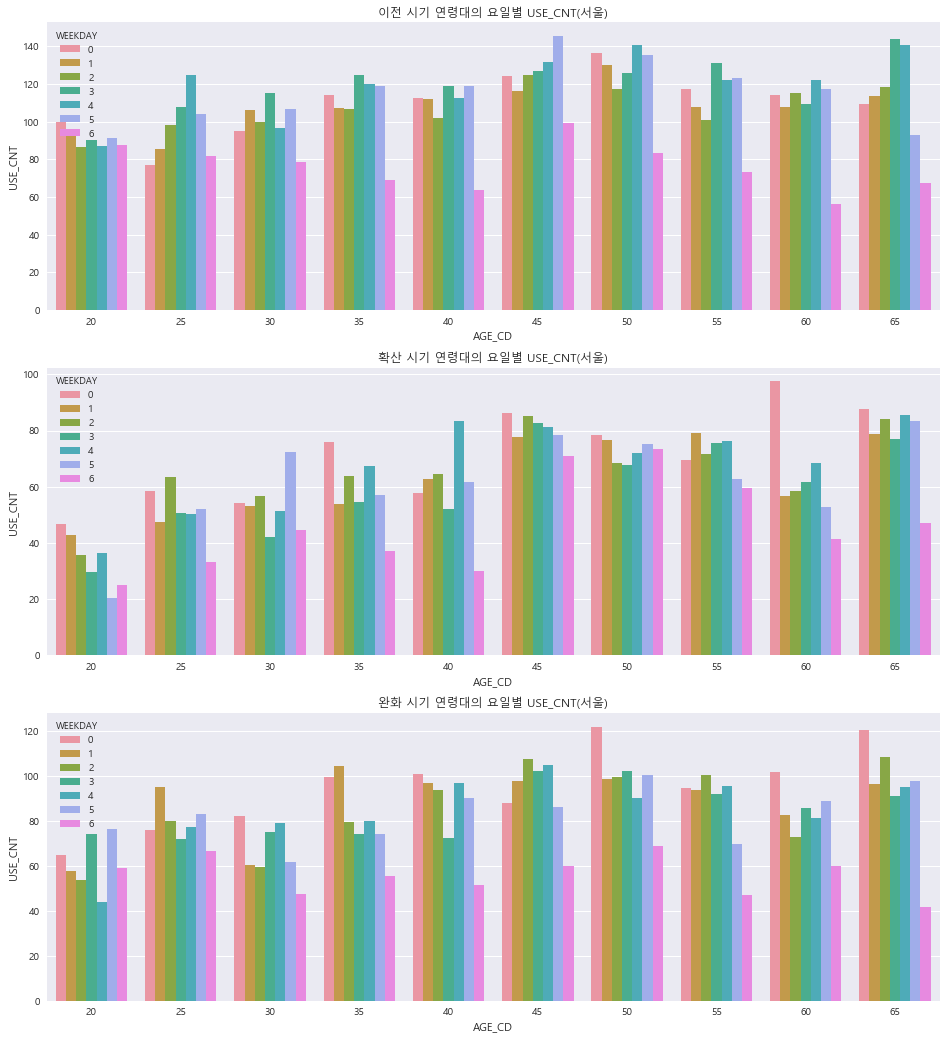

In [312]:
period_weekday_hue_age_seoul('USE_CNT')

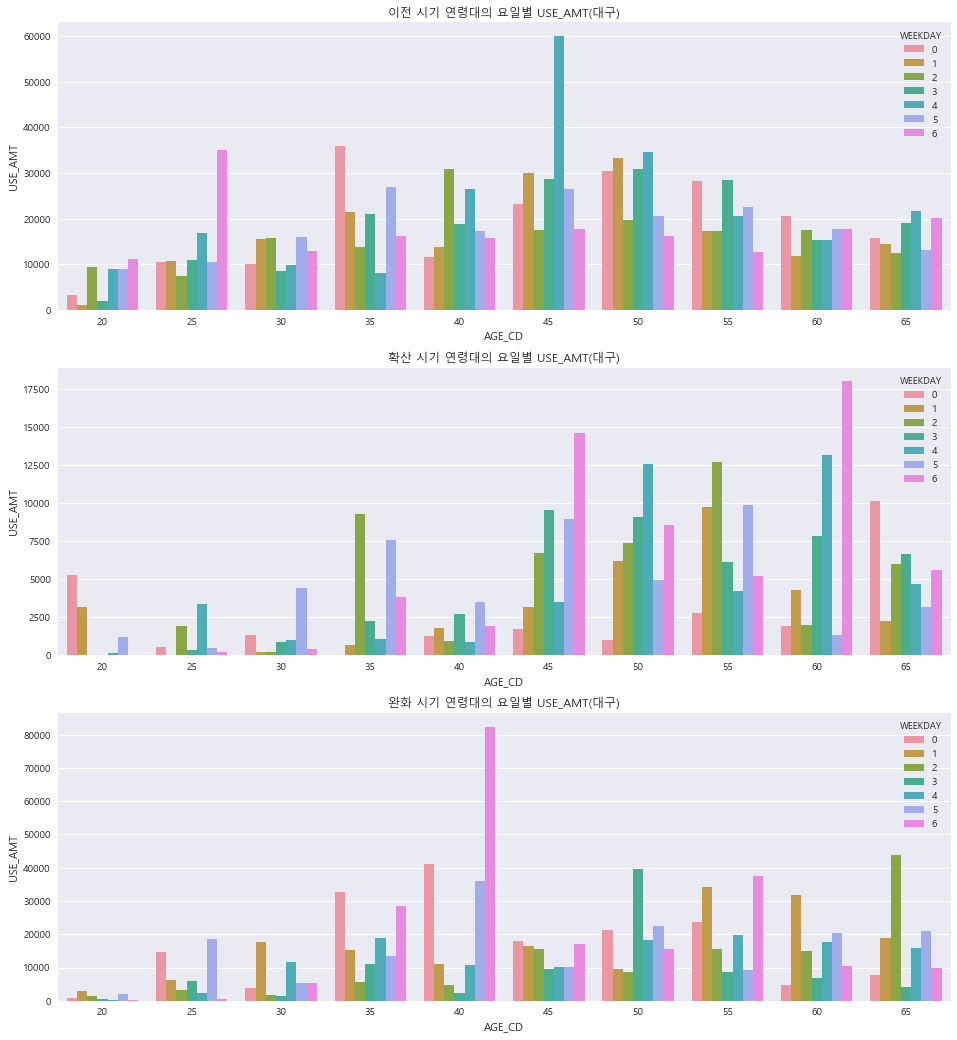

In [313]:
period_weekday_hue_age_daegu('USE_AMT')

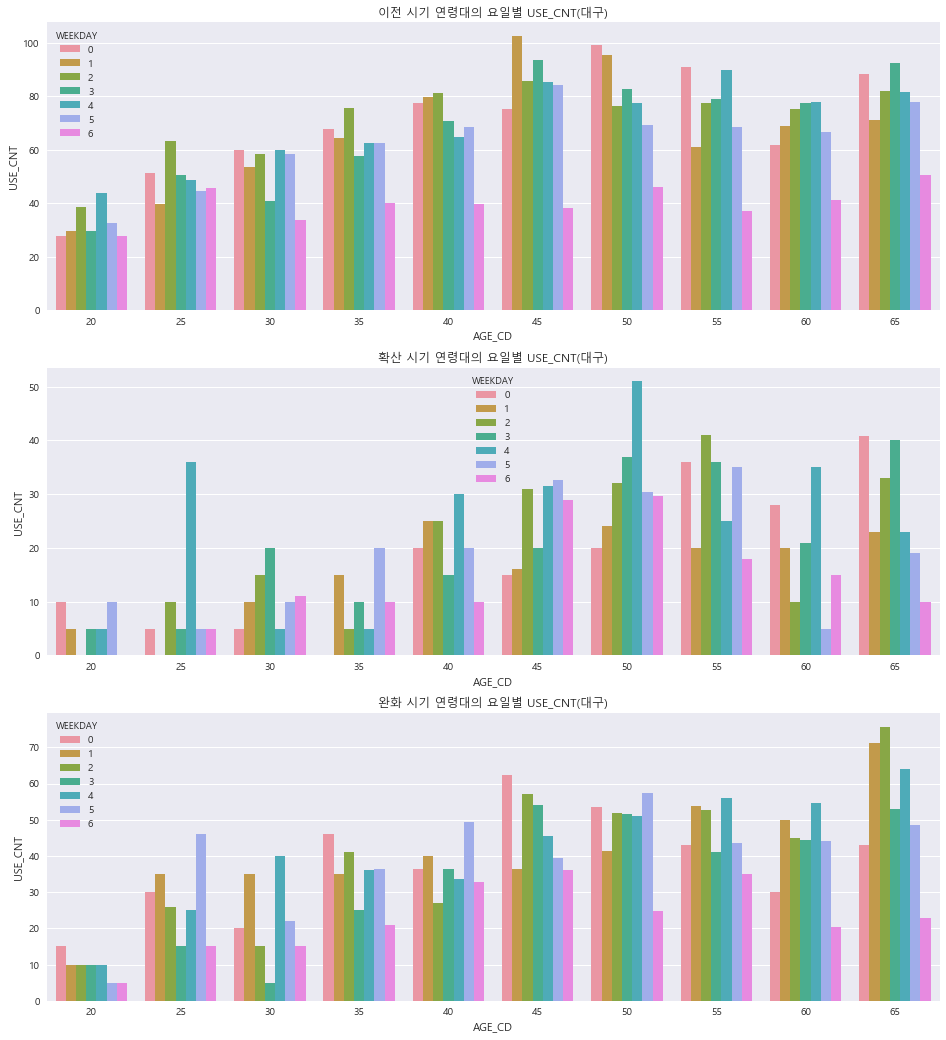

In [314]:
period_weekday_hue_age_daegu('USE_CNT')

**서울**<br>


# 성별 분석

Text(0.5, 1.0, '성별의 시기별 소비금액')

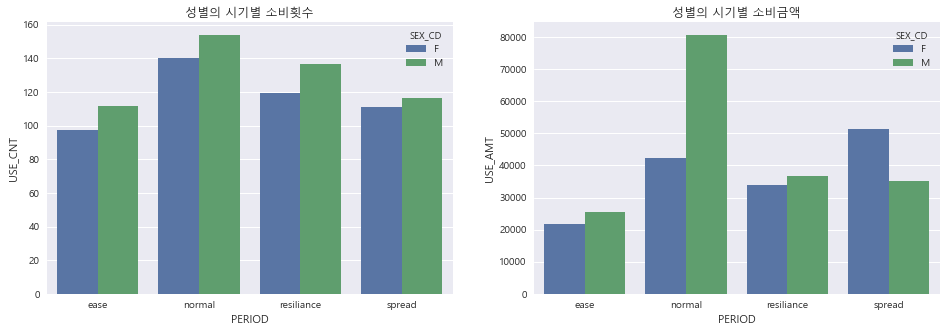

In [238]:
# YEAR, MONTH로 묶고 AMT, CNT 합 구하기
category_df = ha.groupby(['PERIOD','SEX_CD','DONG_CD'])[['USE_AMT', 'USE_CNT']].mean().reset_index()
category_df = category_df.groupby(['PERIOD','SEX_CD'])[['USE_AMT', 'USE_CNT']].sum().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.barplot(x=category_df['PERIOD'], y=category_df['USE_CNT'], hue='SEX_CD', data=category_df, ax=axes[0])
sns.barplot(x=category_df['PERIOD'], y=category_df['USE_AMT'], hue='SEX_CD', data=category_df, ax=axes[1])
axes[0].set_title("성별의 시기별 소비횟수")
axes[1].set_title("성별의 시기별 소비금액")

In [239]:
def period_weekday_hue_sex(peri):
    category_df = ha.query('PERIOD == "{}"'.format(peri)).groupby(['SEX_CD','DONG_CD','WEEKDAY'])[['USE_AMT', 'USE_CNT']].mean().reset_index()
    category_df = category_df.groupby(['SEX_CD','WEEKDAY'])[['USE_AMT', 'USE_CNT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    sns.barplot(x=category_df['WEEKDAY'], y=category_df['USE_CNT'], hue='SEX_CD', data=category_df, ax=axes[0])
    sns.barplot(x=category_df['WEEKDAY'], y=category_df['USE_AMT'], hue='SEX_CD', data=category_df, ax=axes[1])
    axes[0].set_title(peri + "시기 연령대의 요일별 소비횟수")
    axes[1].set_title(peri + "시기 연령대의 요일별 소비금액")

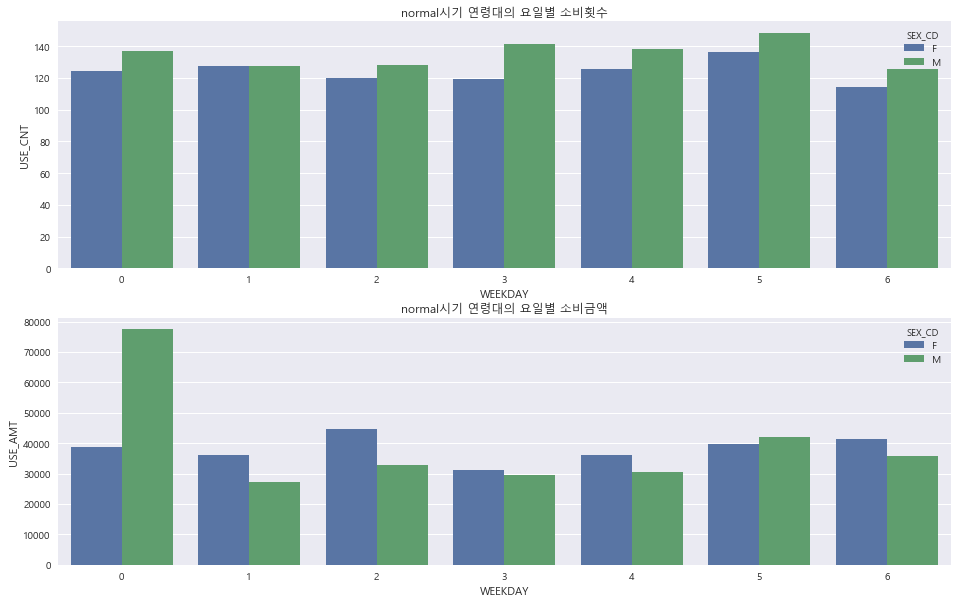

In [240]:
period_weekday_hue_sex('normal')

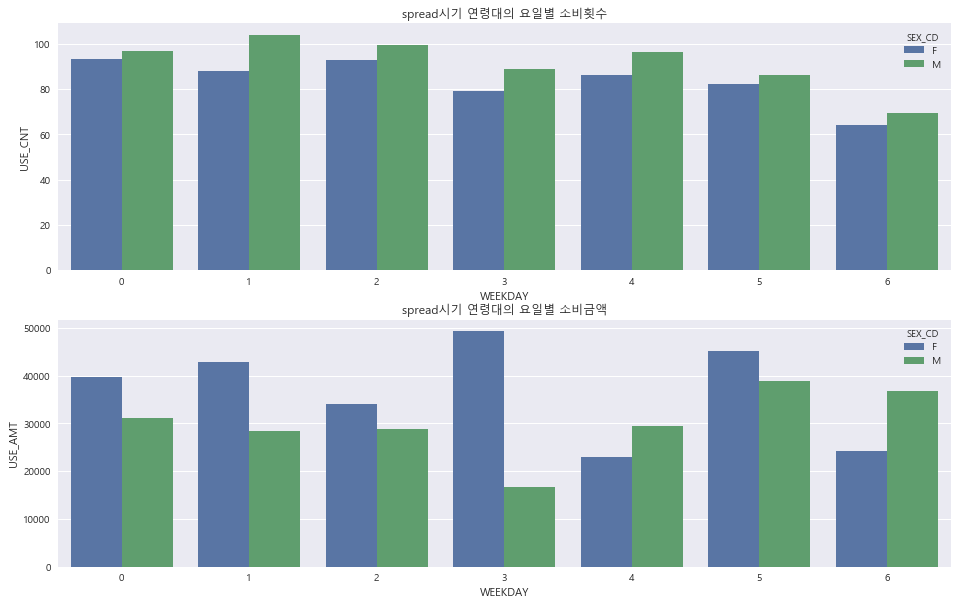

In [241]:
period_weekday_hue_sex('spread')

In [ ]:
for age in ha['AGE_CD'].unique:
    category_df = ha.query('AGE_CD == "{}"'.format(age)).groupby(['SEX_CD','DONG_CD','WEEKDAY'])[['USE_AMT', 'USE_CNT']].mean().reset_index()
    category_df = category_df.groupby(['SEX_CD','WEEKDAY'])[['USE_AMT', 'USE_CNT']].sum().reset_index()
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    sns.barplot(x=category_df['WEEKDAY'], y=category_df['USE_CNT'], hue='SEX_CD', data=category_df, ax=axes[0])
    sns.barplot(x=category_df['WEEKDAY'], y=category_df['USE_AMT'], hue='SEX_CD', data=category_df, ax=axes[1])
    axes[0].set_title(peri + "시기 연령대의 요일별 소비횟수")
    axes[1].set_title(peri + "시기 연령대의 요일별 소비금액")